# Loan default prediction challenge

# Data description

Kowope Mart is a Nigerian-based retail company with a vision to provide quality goods, education and automobile services to its customers at affordable price and reduce if not eradicate charges on card payments and increase customer satisfaction with credit rewards that can be used within the Mall. To achieve this, the company has partnered with DSBank on co-branded credit card with additional functionality such that customers can request for loan, pay for goods even with zero-balance and then pay back within an agreed period of time. This innovative strategy has increased sales for the company. However, there has been recent cases of credit defaults and Kowope Mart will like to have a system that profiles customers who are worthy of the card with minimum if not zero risk of defaulting.

The data set can be accessed using the link below: https://zindi.africa/hackathons/dsn-ai-bootcamp-qualification-hackathon
        
The basis of the project is to predict customers who are likely to default or not.

default_status: defaulted or not. (yes:1, no: 0)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

import os, sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('C:\Users\Ife\Desktop\Rasheed doc\loan_train.csv')

test = pd.read_csv('C:\Users\Ife\Desktop\Rasheed doc\loan_test.csv')

In [3]:
train.shape, test.shape

((56000, 52), (24000, 51))

In [4]:
data = train.copy()

In [5]:
data.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


# Cleaning data: drop and filling NaN values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
Applicant_ID      56000 non-null object
form_field1       53471 non-null float64
form_field2       52156 non-null float64
form_field3       55645 non-null float64
form_field4       55645 non-null float64
form_field5       55645 non-null float64
form_field6       42640 non-null float64
form_field7       50837 non-null float64
form_field8       42640 non-null float64
form_field9       47992 non-null float64
form_field10      55645 non-null float64
form_field11      24579 non-null float64
form_field12      46105 non-null float64
form_field13      50111 non-null float64
form_field14      56000 non-null float64
form_field15      33525 non-null float64
form_field16      42964 non-null float64
form_field17      44849 non-null float64
form_field18      45598 non-null float64
form_field19      55996 non-null float64
form_field20      55645 non-null float64
form_field21      40146 non-nul

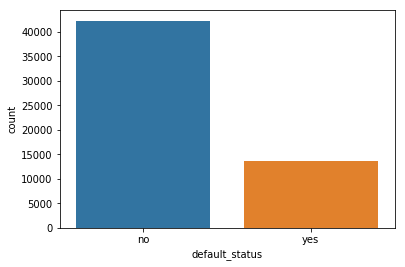

In [7]:
sns.countplot('default_status', data = data)

# Drop NaN values

In [8]:
#Since number of valid entries in some column is too small compared to the overall data, the missing values will be dropped

data = data.drop(['form_field6'], axis =1)
test = test.drop(['form_field6'], axis =1)

In [9]:
data = data.drop(['form_field8'], axis =1)
test = test.drop(['form_field8'], axis =1)

In [10]:
data = data.drop(['form_field9'], axis =1)
test = test.drop(['form_field9'], axis =1)

In [11]:
data = data.drop(['form_field11'], axis =1)
test = test.drop(['form_field11'], axis =1)

In [12]:
data = data.drop(['form_field12'], axis =1)
test = test.drop(['form_field12'], axis =1)

In [13]:
data = data.drop(['form_field15'], axis =1)
test = test.drop(['form_field15'], axis =1)

In [14]:
data = data.drop(['form_field16'], axis =1)
test = test.drop(['form_field16'], axis =1)

In [15]:
data = data.drop(['form_field17'], axis =1)
test = test.drop(['form_field17'], axis =1)

In [16]:
data = data.drop(['form_field18'], axis =1)
test = test.drop(['form_field18'], axis =1)

In [17]:
data = data.drop(['form_field21'], axis =1)
test = test.drop(['form_field21'], axis =1)

In [18]:
data = data.drop(['form_field22'], axis =1)
test = test.drop(['form_field22'], axis =1)

In [19]:
data = data.drop(['form_field23'], axis =1)
test = test.drop(['form_field23'], axis =1)

In [20]:
data = data.drop(['form_field24'], axis =1)
test = test.drop(['form_field24'], axis =1)

In [21]:
data = data.drop(['form_field26'], axis =1)
test = test.drop(['form_field26'], axis =1)

In [22]:
data = data.drop(['form_field27'], axis =1)
test = test.drop(['form_field27'], axis =1)

In [23]:
data = data.drop(['form_field30'], axis =1)
test = test.drop(['form_field30'], axis =1)

In [24]:
data = data.drop(['form_field31'], axis =1)
test = test.drop(['form_field31'], axis =1)

In [25]:
data = data.drop(['form_field35'], axis =1)
test = test.drop(['form_field35'], axis =1)

In [26]:
data = data.drop(['form_field40'], axis =1)
test = test.drop(['form_field40'], axis =1)

In [27]:
data = data.drop(['form_field41'], axis =1)
test = test.drop(['form_field41'], axis =1)

In [28]:
data = data.drop(['form_field45'], axis =1)
test = test.drop(['form_field45'], axis =1)

In [29]:
data = data.drop(['form_field46'], axis =1)
test = test.drop(['form_field46'], axis =1)

In [30]:
data = data.drop(['form_field48'], axis =1)
test = test.drop(['form_field48'], axis =1)

In [31]:
data = data.drop(['form_field50'], axis =1)
test = test.drop(['form_field50'], axis =1)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 28 columns):
Applicant_ID      56000 non-null object
form_field1       53471 non-null float64
form_field2       52156 non-null float64
form_field3       55645 non-null float64
form_field4       55645 non-null float64
form_field5       55645 non-null float64
form_field7       50837 non-null float64
form_field10      55645 non-null float64
form_field13      50111 non-null float64
form_field14      56000 non-null float64
form_field19      55996 non-null float64
form_field20      55645 non-null float64
form_field25      50550 non-null float64
form_field28      55645 non-null float64
form_field29      55645 non-null float64
form_field32      50550 non-null float64
form_field33      54744 non-null float64
form_field34      55645 non-null float64
form_field36      54005 non-null float64
form_field37      50550 non-null float64
form_field38      55645 non-null float64
form_field39      51789 non-nul

In [33]:
data.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field7,form_field10,form_field13,form_field14,...,form_field36,form_field37,form_field38,form_field39,form_field42,form_field43,form_field44,form_field47,form_field49,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,10689720.0,11333126.0,7875694.0,96375139.0,...,12.0,12.0,4.0,0.0,0.392854,2.02,0.711632,charge,1.129518,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,898979.0,2533168.0,2141445.0,28141427.0,...,16.0,24.0,8.0,0.0,0.314281,8.08,0.183584,charge,1.620483,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,956940.0,1079864.0,0.0,16576457.0,...,12.0,0.0,6.0,0.0,0.162965,18.18,0.791136,charge,1.513370,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,3044703.0,3621979.0,1186839.0,48187375.0,...,4.0,8.0,4.0,1.0,0.488884,2.02,0.685168,charge,0.664452,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,214728.0,361770.0,511535.0,28141427.0,...,24.0,2.0,24.0,0.0,0.275000,12.12,0.438168,charge,1.427891,no


# Filling NaN values 
# form_field1-5

In [34]:
data['form_field1'].median()

3484.0

In [35]:
data['form_field1'] = data['form_field1'].fillna(data['form_field1'].median())

test['form_field1'] = test['form_field1'].fillna(test['form_field1'].median())

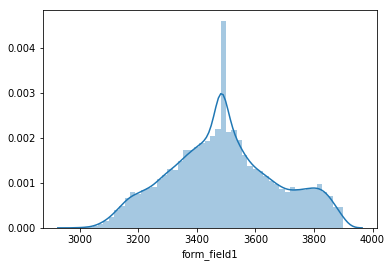

In [36]:
sns.distplot(data['form_field1'])

In [37]:
data['form_field2'].mean()

0.5507368490681812

In [38]:
data['form_field2'] = data['form_field2'].fillna(data['form_field2'].mean())

test['form_field2'] = test['form_field2'].fillna(test['form_field2'].mean())

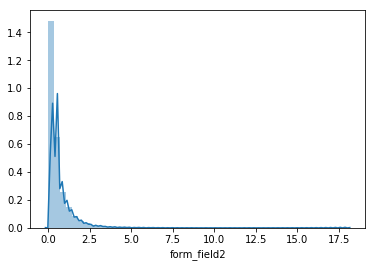

In [39]:
sns.distplot(data['form_field2'])

In [40]:
data['form_field3'].mean()

1.052225040884184

In [41]:
data['form_field3'] = data['form_field3'].fillna(data['form_field3'].mean())

test['form_field3'] = test['form_field3'].fillna(test['form_field3'].mean())

In [42]:
data['form_field4'].mean()

0.8519789307215396

In [43]:
data['form_field4'] = data['form_field4'].fillna(data['form_field4'].mean())

test['form_field4'] = test['form_field4'].fillna(test['form_field4'].mean())

In [44]:
data['form_field5'] = data['form_field5'].fillna(data['form_field5'].mean())

test['form_field5'] = test['form_field5'].fillna(test['form_field5'].mean())

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 28 columns):
Applicant_ID      56000 non-null object
form_field1       56000 non-null float64
form_field2       56000 non-null float64
form_field3       56000 non-null float64
form_field4       56000 non-null float64
form_field5       56000 non-null float64
form_field7       50837 non-null float64
form_field10      55645 non-null float64
form_field13      50111 non-null float64
form_field14      56000 non-null float64
form_field19      55996 non-null float64
form_field20      55645 non-null float64
form_field25      50550 non-null float64
form_field28      55645 non-null float64
form_field29      55645 non-null float64
form_field32      50550 non-null float64
form_field33      54744 non-null float64
form_field34      55645 non-null float64
form_field36      54005 non-null float64
form_field37      50550 non-null float64
form_field38      55645 non-null float64
form_field39      51789 non-nul

# form_field 7, 10, 13, 14

In [46]:
data['form_field7'].median()

2704328.0

In [47]:
data['form_field7'] = data['form_field7'].fillna(data['form_field7'].median())

test['form_field7'] = test['form_field7'].fillna(test['form_field7'].median())

In [48]:
data['form_field10'].median()

3707559.0

In [49]:
data['form_field10'] = data['form_field10'].fillna(data['form_field10'].median())

test['form_field10'] = test['form_field10'].fillna(test['form_field10'].median())

In [50]:
data['form_field13'] = data['form_field13'].fillna(data['form_field13'].median())

test['form_field13'] = test['form_field13'].fillna(test['form_field13'].median())

In [51]:
data['form_field14'] = data['form_field14'].fillna(data['form_field14'].median())

test['form_field14'] = test['form_field14'].fillna(test['form_field14'].median())

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 28 columns):
Applicant_ID      56000 non-null object
form_field1       56000 non-null float64
form_field2       56000 non-null float64
form_field3       56000 non-null float64
form_field4       56000 non-null float64
form_field5       56000 non-null float64
form_field7       56000 non-null float64
form_field10      56000 non-null float64
form_field13      56000 non-null float64
form_field14      56000 non-null float64
form_field19      55996 non-null float64
form_field20      55645 non-null float64
form_field25      50550 non-null float64
form_field28      55645 non-null float64
form_field29      55645 non-null float64
form_field32      50550 non-null float64
form_field33      54744 non-null float64
form_field34      55645 non-null float64
form_field36      54005 non-null float64
form_field37      50550 non-null float64
form_field38      55645 non-null float64
form_field39      51789 non-nul

# form field 19

In [53]:
data['form_field19'].median()

0.0

In [54]:
data['form_field19'] = data['form_field19'].fillna(data['form_field19'].median())

test['form_field19'] = test['form_field19'].fillna(test['form_field19'].median())

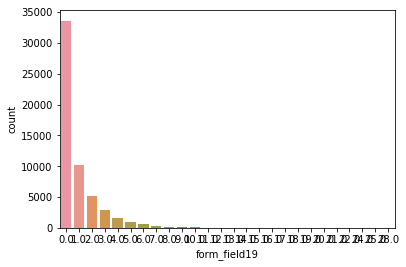

In [55]:
sns.countplot('form_field19', data=data)

In [56]:
def transform_formfield19(data):
    out=0
    if data == 0:
        out = 0
    else:
        out = 1
    return out

In [57]:
data['form_field19'] = data['form_field19'].apply(transform_formfield19).astype(int)

test['form_field19'] = test['form_field19'].apply(transform_formfield19).astype(int)

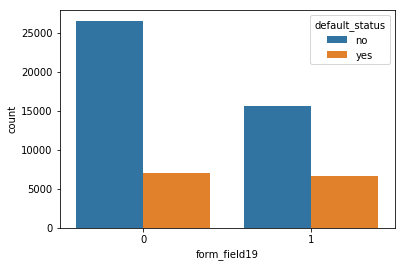

In [58]:
sns.countplot('form_field19', data=data, hue='default_status')

# formfield20

In [59]:
data['form_field20'].median()

0.0

In [60]:
data['form_field20'] = data['form_field20'].fillna(data['form_field20'].median())

test['form_field20'] = test['form_field20'].fillna(test['form_field20'].median())

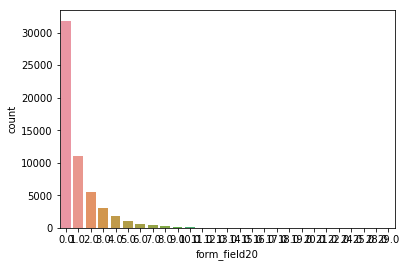

In [61]:
sns.countplot('form_field20', data=data)

In [62]:
def transform_formfield20(data):
    out = 0
    if data == 0:
        out = 0
    else:
        out = 1
    return out

In [63]:
data['form_field20'] = data['form_field20'].apply(transform_formfield20).astype(int)

test['form_field20'] = test['form_field20'].apply(transform_formfield20).astype(int)

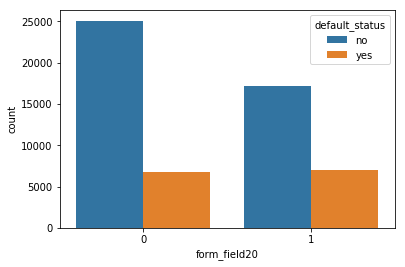

In [64]:
sns.countplot('form_field20', data=data, hue ='default_status')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 28 columns):
Applicant_ID      56000 non-null object
form_field1       56000 non-null float64
form_field2       56000 non-null float64
form_field3       56000 non-null float64
form_field4       56000 non-null float64
form_field5       56000 non-null float64
form_field7       56000 non-null float64
form_field10      56000 non-null float64
form_field13      56000 non-null float64
form_field14      56000 non-null float64
form_field19      56000 non-null int32
form_field20      56000 non-null int32
form_field25      50550 non-null float64
form_field28      55645 non-null float64
form_field29      55645 non-null float64
form_field32      50550 non-null float64
form_field33      54744 non-null float64
form_field34      55645 non-null float64
form_field36      54005 non-null float64
form_field37      50550 non-null float64
form_field38      55645 non-null float64
form_field39      51789 non-null fl

# formfield 25, 28, 29, 32, 33, 34

In [66]:
data['form_field25'].median()

2203.5

In [67]:
data['form_field25'] = data['form_field25'].fillna(data['form_field25'].median())

test['form_field25'] = test['form_field25'].fillna(test['form_field25'].median())

In [68]:
data['form_field28'].median()

486.0

In [69]:
data['form_field28'] = data['form_field28'].fillna(data['form_field28'].median())

test['form_field28'] = test['form_field28'].fillna(test['form_field28'].median())

In [70]:
data['form_field29'].median()

15057.0

In [71]:
data['form_field29'] = data['form_field29'].fillna(data['form_field29'].median())

test['form_field29'] = test['form_field29'].fillna(test['form_field29'].median())

In [72]:
data['form_field32'].median()

598.0

In [73]:
data['form_field32'] = data['form_field32'].fillna(data['form_field32'].median())

test['form_field32'] = test['form_field32'].fillna(test['form_field32'].median())

In [74]:
data['form_field33'].mean()

13.92658344293429

In [75]:
data['form_field33'] = data['form_field33'].fillna(data['form_field33'].mean())

test['form_field33'] = test['form_field33'].fillna(test['form_field33'].mean())

In [76]:
data['form_field34'].median()

0.0

In [77]:
data['form_field34'] = data['form_field34'].fillna(data['form_field34'].median())

test['form_field34'] = test['form_field34'].fillna(test['form_field34'].median())

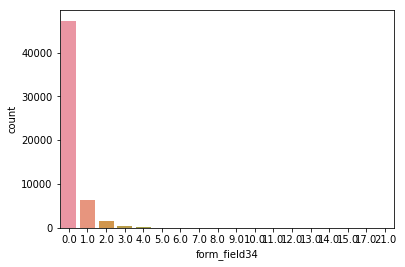

In [78]:
sns.countplot('form_field34', data = data)

In [79]:
def transform_formfield34(data):
    out = 0
    if data == 0:
        out = 0
    else:
        out = 1
    return out

In [80]:
data['form_field34'] = data['form_field34'].apply(transform_formfield34).astype(int)

test['form_field34'] = test['form_field34'].apply(transform_formfield34).astype(int)

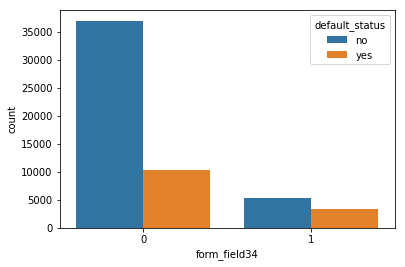

In [81]:
sns.countplot('form_field34', data = data, hue = 'default_status')

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 28 columns):
Applicant_ID      56000 non-null object
form_field1       56000 non-null float64
form_field2       56000 non-null float64
form_field3       56000 non-null float64
form_field4       56000 non-null float64
form_field5       56000 non-null float64
form_field7       56000 non-null float64
form_field10      56000 non-null float64
form_field13      56000 non-null float64
form_field14      56000 non-null float64
form_field19      56000 non-null int32
form_field20      56000 non-null int32
form_field25      56000 non-null float64
form_field28      56000 non-null float64
form_field29      56000 non-null float64
form_field32      56000 non-null float64
form_field33      56000 non-null float64
form_field34      56000 non-null int32
form_field36      54005 non-null float64
form_field37      50550 non-null float64
form_field38      55645 non-null float64
form_field39      51789 non-null floa

# formfield 36, 37, 38, 39, 42

In [83]:
data['form_field36'].median()

10.0

In [84]:
data['form_field36'] = data['form_field36'].fillna(data['form_field36'].median())

test['form_field36'] = test['form_field36'].fillna(test['form_field36'].median())

In [85]:
data['form_field37'] = data['form_field37'].fillna(data['form_field37'].median())

test['form_field37'] = test['form_field37'].fillna(test['form_field37'].median())

In [86]:
data['form_field38'] = data['form_field38'].fillna(data['form_field38'].median())

test['form_field38'] = test['form_field38'].fillna(test['form_field38'].median())

In [87]:
data['form_field39'].median()

0.0

In [88]:
data['form_field39'] = data['form_field39'].fillna(data['form_field39'].median())

test['form_field39'] = test['form_field39'].fillna(test['form_field39'].median())

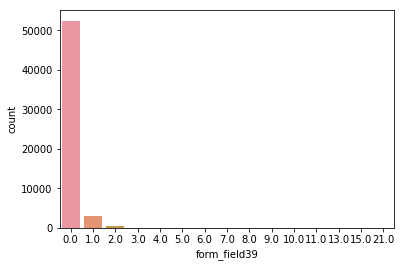

In [89]:
sns.countplot('form_field39', data = data)

In [90]:
def transform_formfield39(data):
    out=0
    if data == 0:
        out = 0
    else:
        out = 1
    return out

In [91]:
data['form_field39'] = data['form_field39'].apply(transform_formfield39).astype(int)

test['form_field39'] = test['form_field39'].apply(transform_formfield39).astype(int)

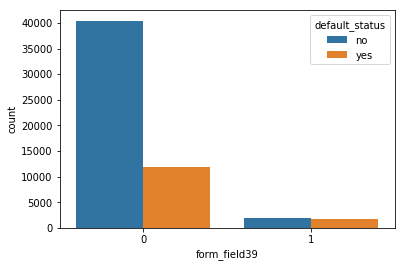

In [92]:
sns.countplot('form_field39', data = data, hue = 'default_status')

In [93]:
data['form_field42'].mean()

0.3682154648023831

In [94]:
data['form_field42'] = data['form_field42'].fillna(data['form_field42'].mean())

test['form_field42'] = test['form_field42'].fillna(test['form_field42'].mean())

# form field 43, 44

In [95]:
data['form_field43'].median()

5.05

In [96]:
data['form_field43'] = data['form_field43'].fillna(data['form_field43'].median())

test['form_field43'] = test['form_field43'].fillna(test['form_field43'].median())

In [97]:
data['form_field44'].mean()

0.5633767960961119

In [98]:
data['form_field44'] = data['form_field44'].fillna(data['form_field44'].mean())

test['form_field44'] = test['form_field44'].fillna(test['form_field44'].mean())

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 28 columns):
Applicant_ID      56000 non-null object
form_field1       56000 non-null float64
form_field2       56000 non-null float64
form_field3       56000 non-null float64
form_field4       56000 non-null float64
form_field5       56000 non-null float64
form_field7       56000 non-null float64
form_field10      56000 non-null float64
form_field13      56000 non-null float64
form_field14      56000 non-null float64
form_field19      56000 non-null int32
form_field20      56000 non-null int32
form_field25      56000 non-null float64
form_field28      56000 non-null float64
form_field29      56000 non-null float64
form_field32      56000 non-null float64
form_field33      56000 non-null float64
form_field34      56000 non-null int32
form_field36      56000 non-null float64
form_field37      56000 non-null float64
form_field38      56000 non-null float64
form_field39      56000 non-null int3

# form field 47

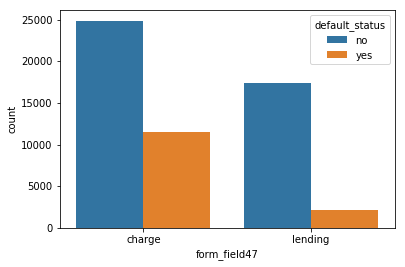

In [100]:
sns.countplot('form_field47', data = data, hue='default_status')

In [101]:
#For this case, we will be using the pandas method for one-hot encoding (we do not want priority) as shown in the code below.
data = pd.get_dummies(data, columns = ['form_field47'])
test = pd.get_dummies(test, columns = ['form_field47'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 29 columns):
Applicant_ID            56000 non-null object
form_field1             56000 non-null float64
form_field2             56000 non-null float64
form_field3             56000 non-null float64
form_field4             56000 non-null float64
form_field5             56000 non-null float64
form_field7             56000 non-null float64
form_field10            56000 non-null float64
form_field13            56000 non-null float64
form_field14            56000 non-null float64
form_field19            56000 non-null int32
form_field20            56000 non-null int32
form_field25            56000 non-null float64
form_field28            56000 non-null float64
form_field29            56000 non-null float64
form_field32            56000 non-null float64
form_field33            56000 non-null float64
form_field34            56000 non-null int32
form_field36            56000 non-null float64
form_

# form_field 49

In [102]:
#drop form field 49
data = data.drop(['form_field49'], axis =1)
test = test.drop(['form_field49'], axis =1)

#  drop Applicant_ID

In [103]:
data_id = data['Applicant_ID']
data = data.drop('Applicant_ID', axis = 1)

test_id = test['Applicant_ID']
test = test.drop('Applicant_ID', axis = 1)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 27 columns):
form_field1             56000 non-null float64
form_field2             56000 non-null float64
form_field3             56000 non-null float64
form_field4             56000 non-null float64
form_field5             56000 non-null float64
form_field7             56000 non-null float64
form_field10            56000 non-null float64
form_field13            56000 non-null float64
form_field14            56000 non-null float64
form_field19            56000 non-null int32
form_field20            56000 non-null int32
form_field25            56000 non-null float64
form_field28            56000 non-null float64
form_field29            56000 non-null float64
form_field32            56000 non-null float64
form_field33            56000 non-null float64
form_field34            56000 non-null int32
form_field36            56000 non-null float64
form_field37            56000 non-null float64
form

# change default status from object to int

In [105]:
def func(data):
    d =[]
    for m in data:
        if m =='yes':
            d.append(1)
        else:
            d.append(0)
    return d

data['default_status'] = func(data['default_status'])

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 27 columns):
form_field1             56000 non-null float64
form_field2             56000 non-null float64
form_field3             56000 non-null float64
form_field4             56000 non-null float64
form_field5             56000 non-null float64
form_field7             56000 non-null float64
form_field10            56000 non-null float64
form_field13            56000 non-null float64
form_field14            56000 non-null float64
form_field19            56000 non-null int32
form_field20            56000 non-null int32
form_field25            56000 non-null float64
form_field28            56000 non-null float64
form_field29            56000 non-null float64
form_field32            56000 non-null float64
form_field33            56000 non-null float64
form_field34            56000 non-null int32
form_field36            56000 non-null float64
form_field37            56000 non-null float64
form

In [107]:
data.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field7,form_field10,form_field13,form_field14,form_field19,...,form_field36,form_field37,form_field38,form_field39,form_field42,form_field43,form_field44,default_status,form_field47_charge,form_field47_lending
0,3436.0,0.28505,1.6560,0.0,0.000,10689720.0,11333126.0,7875694.0,96375139.0,1,...,12.0,12.0,4.0,0,0.392854,2.02,0.711632,0,1,0
1,3456.0,0.67400,0.2342,0.0,0.000,898979.0,2533168.0,2141445.0,28141427.0,1,...,16.0,24.0,8.0,0,0.314281,8.08,0.183584,0,1,0
2,3276.0,0.53845,3.1510,0.0,6.282,956940.0,1079864.0,0.0,16576457.0,0,...,12.0,0.0,6.0,0,0.162965,18.18,0.791136,1,1,0
3,3372.0,0.17005,0.5050,0.0,0.000,3044703.0,3621979.0,1186839.0,48187375.0,1,...,4.0,8.0,4.0,1,0.488884,2.02,0.685168,0,1,0
4,3370.0,0.77270,1.1010,0.0,0.000,214728.0,361770.0,511535.0,28141427.0,1,...,24.0,2.0,24.0,0,0.275000,12.12,0.438168,0,1,0


In [108]:
data.shape, test.shape

((56000, 27), (24000, 26))

# MODELLING

In [109]:
#Now that I have been able to process all dirt in my features i.e cleaning my data
#I can go ahead to separate the target from the actual data using the code below.

y = data['default_status']
x = data.drop(['default_status'], axis =1 )

In [110]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state = 42)

# Random forest

In [112]:
# rand = RandomForestClassifier(random_state= 42)
# rand.fit(x_train, y_train) # model learning

# # evaluating the train data using accuracy score 
# print('Training score is:', rand.score(x_train, y_train))

# # make your predictions on the test data
# pred= rand.predict(x_test)

# # evaluate the test data using accuracy score
# print('Testing score is:', accuracy_score(y_test, pred))

# LOGISTIC REGRESSION

In [120]:
# Lr = LogisticRegression() # algorithm instantiation
# Lr.fit(x_train, y_train) # model learning

# print('Training score is: ', Lr.score(x_train, y_train))
# pred = Lr.predict_proba(x_test)
# print('Testing score is: ', accuracy_score(y_test, pred))

# GRADIENT BOOSTING

In [115]:
# model_grb = GradientBoostingClassifier()
# model_grb.fit(x_train,y_train)# model learning

# print('Training score is :', model_grb.score(x_train, y_train))
# pred = model_grb.predict(x_test)
# print('Testing score is:', accuracy_score(y_test,pred))

# XGB

In [116]:
model_xgb = XGBClassifier()

model = model_xgb.fit(x_train, y_train)
y_pred = model_xgb.predict_proba(x_test) #predict probability of the test data
print('train score: ', model_xgb.score(x_train, y_train))
print('test score: ',  accuracy_score(y_test, y_pred))

('train score: ', 0.8112946428571428)


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

# My prediction

In [ ]:
test.shape, x_train.shape

In [ ]:
# gradient_boost_prediction = model_grb.predict(test)
# random_forest_prediction = rand.predict(test)
# logistic_regression_prediction = Lr.predict(test)
xgb_prediction = model_xgb.predict(test)

# Random Forest Prediction

In [ ]:
# frame_dict = {}
# frame_dict['ApplicantID'] = test_id
# frame_dict['default_status'] = random_forest_prediction
# frame = pd.DataFrame(frame_dict)

# frame.to_csv('random_forest.csv', index= False)

# Gradient Boosting Prediction

In [ ]:
# frame_dict = {}
# frame_dict['ApplicantID'] = test_id
# frame_dict['default_status'] = gradient_boost_prediction
# frame = pd.DataFrame(frame_dict)

# frame.to_csv('gradient_boosting.csv', index= False)

# XGB Prediction

In [ ]:
frame_dict = {}
frame_dict['ApplicantID'] = test_id
frame_dict['xgb_prediction'] = xgb_prediction
frame = pd.DataFrame(frame_dict)

frame.to_csv('xgb2.csv', index= False)